![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [12]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [13]:
#Step 2: Data Preprocessing

    #Find missing values

print(penguins_df.isnull().sum())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [14]:
    # Convert Categorical Data to Numerical Data
        # Encode the 'sex' column
penguins_df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [15]:
# dtype='int' ensure the output will be 0/1 instead of True/False

penguins_df["sex"] = penguins_df["sex"].map({"MALE": 1, "FEMALE": 0}) # Convert categorical variables into dummy/indicator variables (USING NUMPY).

penguins_df = pd.get_dummies(penguins_df, dtype='int') # Convert categorical variables into dummy/indicator variables (USING PANDAS)

# dtype='int' ensure the output will be 0/1 instead of True/False

penguins_df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [16]:
 #Standardize our data 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(penguins_df)

#Inspect the standardized features
features_scaled[:5]

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747, -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343, -1.00604235],
       [-1.34473838,  1.09690132, -0.5691051 , -0.93955126, -1.00604235],
       [-0.86716981,  1.76107445, -0.78316427, -0.6911491 ,  0.99399394]])

In [17]:
#step-3 : Find the optimal number of clustere
    
    # Determine the optimal number of cluster using silhouette score

silhouette_scores = []
for k in range (2,11):
    kmeans = KMeans(n_clusters = k , random_state = 42)
    labels = kmeans.fit_predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled , labels))

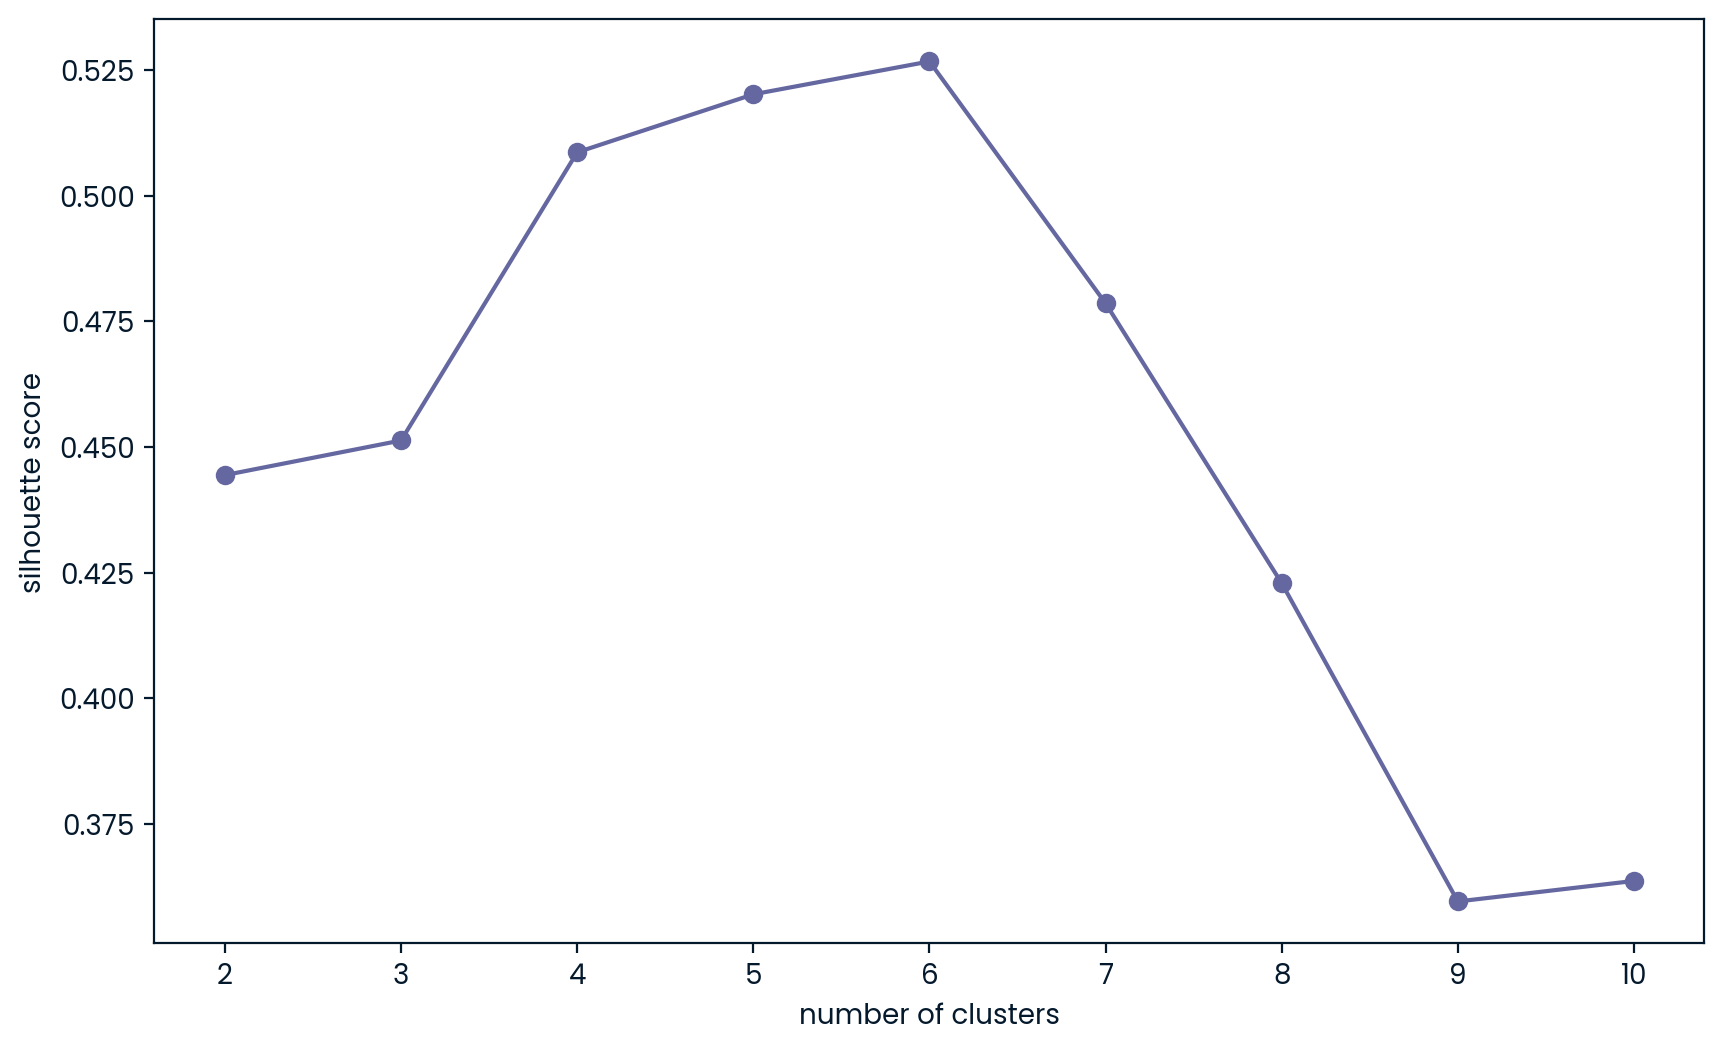

In [18]:
  # plot the silhouette score graph
plt.figure(figsize =(10,6))
plt.plot(range(2,11), silhouette_scores, marker="o")
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.show()

In [19]:
#step-4: Applying K-Means

   #perform clustering with the optimal number of clusters

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(features_scaled)

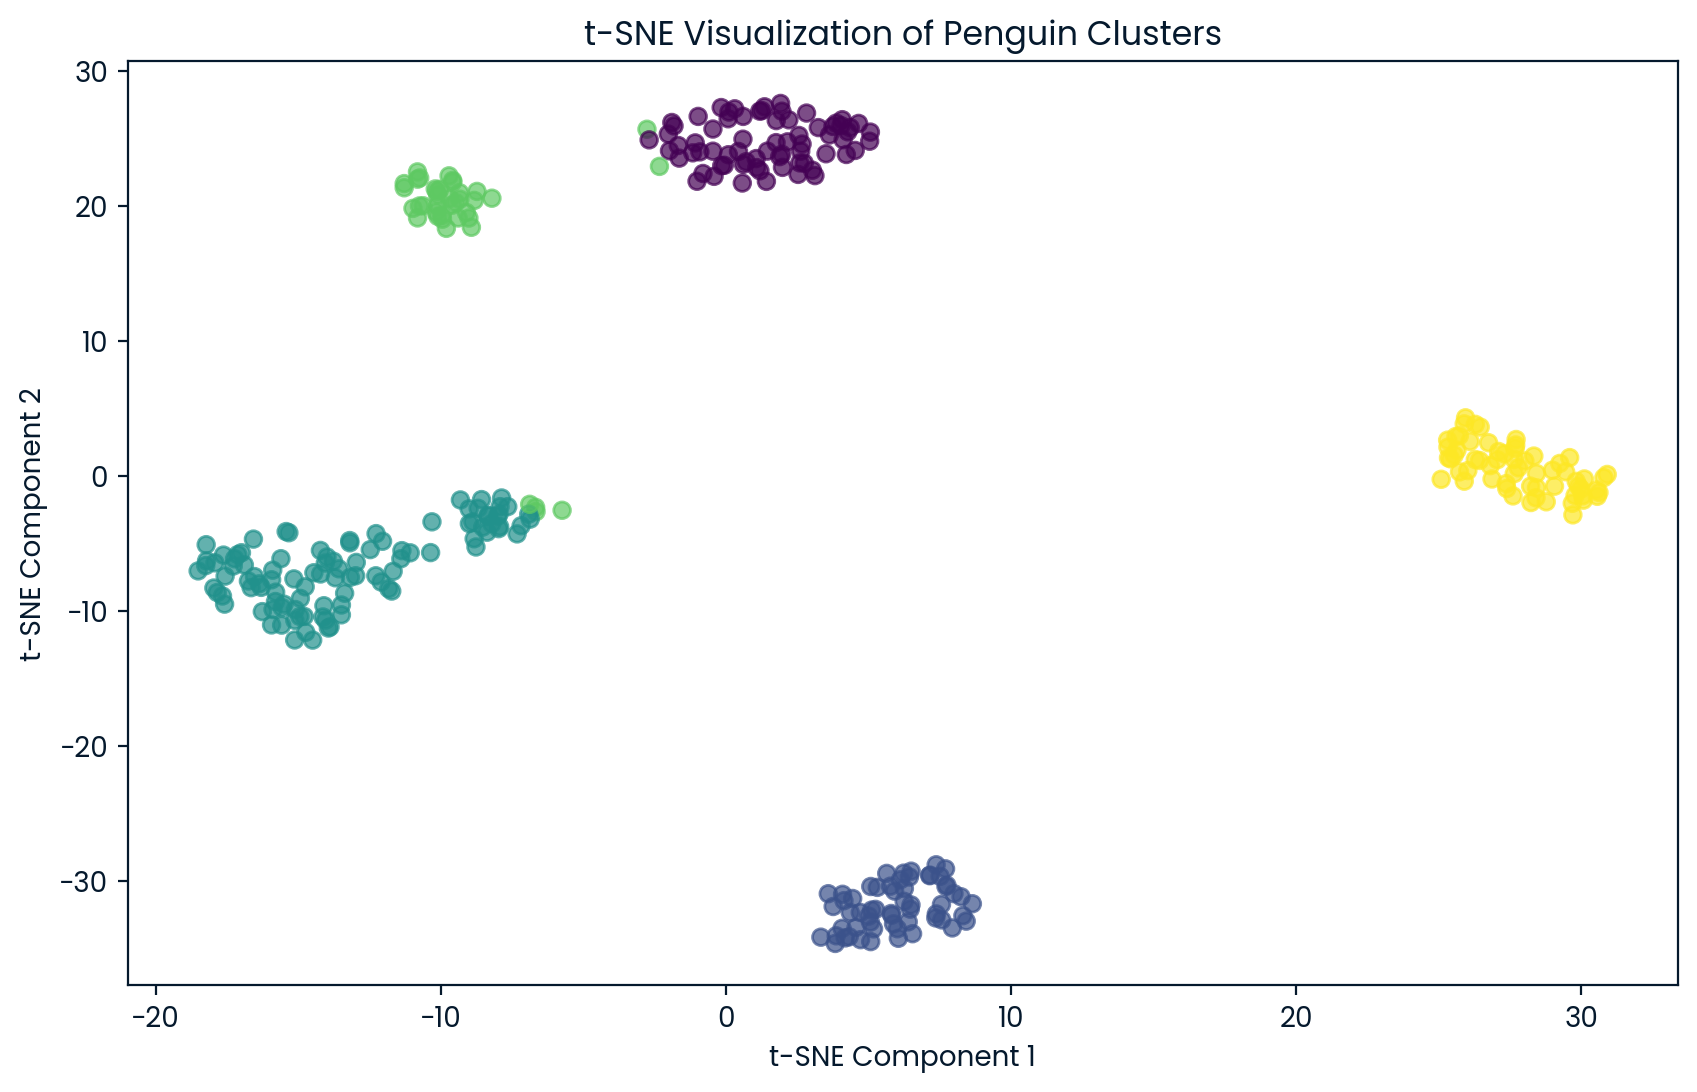

In [20]:
# STEP-5 : visualize the clusters using T-SNE. reduces the data to 2D or 3D.Because we have more than 3 columns thats why we use t_sne

from sklearn.manifold import TSNE

# Reduce dimensions with t-SNE

tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)

# Plot the t-SNE results with cluster colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Add legend based on unique cluster labels
plt.title('t-SNE Visualization of Penguin Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [21]:
# Add the cluster labels to the original DataFrame
penguins_df['label'] = labels

# Select numeric columns to calculate cluster statistics
numeric_columns = penguins_df.select_dtypes(include=['float64', 'int64']).columns

# Group by cluster labels and calculate the mean for each cluster
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()

# Display the stat_penguins DataFrame
print(stat_penguins)


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
label                                                                        
0             40.315714        19.011429         192.242857  4034.642857  1.0
1             45.563793        14.237931         212.706897  4679.741379  0.0
2             39.744660        17.588350         188.864078  3410.679612  0.0
3             50.965000        19.195000         199.075000  3920.625000  0.9
4             49.473770        15.718033         221.540984  5484.836066  1.0
